# Documentation
## CS207 Final Project, Group 28
#### Team Members:
* Josh Bodner  
* Théo Guenais  
* Daiki Ina  
* Junzhi Gong

# Introduction

Ever since the notion of a derivative was first defined in the days of Newton and Leibniz, differentiation has become a crucial component across quantitative analyses. Today, differentiation is applied within a wide range of scientific disciplines from cell biology to electrical engineering and astrophysics. Differentiation is also central to the domain of optimization where it is applied to find maximum and minimum values of functions.

Because of the widespread use and applicability of differentiation, it would be highly beneficial if scientists could efficiently calculate derivatives of functions using a Python package. Such a package could save scientists time and energy from having to compute derivatives symbolically, which can be especially complicated if the function of interest has vector inputs and outputs.

Our Python package, **autodiff**, addresses this need by allowing the user to implement the forward mode of automatic differentiation (AD). Using AD, we are able to calculate derivatives to machine precision in a manner that is less costly than symbolic differentiation.

# Background
In this section we provide a brief overview of the mathematical concepts relevant to our implementation:

##### 1. Multivariable Differental Calculus:

Let $f: {\rm R^m} \rightarrow {\rm R^n}: x \mapsto f(x)$ . Under certain regularity and smoothness assumptions, we define the derivative of f as $ f': {\rm R^m} \rightarrow L_{{\rm R^m}, {\rm R^n}}$, with $ L_{{\rm R^m}, {\rm R^n}}$ being the space of the linear mapping $ {\rm R^m}\rightarrow {\rm R^n}$ which can be transformed to $ {\rm R^{mxn}}$.

*This general definition might be broken due to lack of smoothness, in which case, we refer to "directional derivatives" and specifically "Gateaux-derivatives".*

From this lense, we can understand the derivative of a function evaluated at a given point to be a matrix. When this function is real-valued, we can obtain a vector $ \nabla_x f \in {\rm R^m} $.

Specifically, the gradient of a scalar-valued multivariable function is a vector of its partial derivatives with respect to each input:

$\nabla f = 
  \begin{bmatrix}
    \frac{\partial f}{\partial x_1} \\
    \frac{\partial f}{\partial x_2} \\
    \frac{\partial f}{\partial x_3} \\
    \vdots
  \end{bmatrix}$

##### 2. Chain Rule
Let $ f: {\rm R^m} \rightarrow {\rm R^n} $ and $ g: {\rm R^p} \rightarrow {\rm R^m} $. 
Then $ f \circ g: {\rm R^p} \rightarrow {\rm R^n} $ is such that (under regularity assumptions), $ (f \circ g)'(x) = f'(g(x)) \cdot g'(x) $. This operational rule, known as the chain rule, is a crucial part of AD.

---

*Example:*  
$ f(x) = sin(x)$  
$ g(x) = e^{x}$  
$ (f \circ g)(x) = sin(e^{x})$  
 
$(f \circ g)'(x) = f'(g(x))g'(x) = cos(e^{x})e^{x}$

##### 3. Automatic Differentiation

*Automatic Differentiation and Forward Mode:* 

Automatic differentiation is a process for evaluating derivatives computationally at a particular evaluation point. Specifically, the forward mode of automatic differentiation calculates the product of the gradient with a seed vector $ \nabla f \cdot p $ or the product of the Jacobian with a seed vector ($Jp$) if $f$ is a multi-dimensional function.

In the forward mode of automatic differentiation, the calculation is done in steps where the partial derivatives and values are computed at each step of the computational graph. The edges of the computational graph are such that transitioning from node to node involves simple operations or calculation of elementary functions such as $sin(x)$, $cos(x)$, $e^{x}$, etc.

*Precision and Efficiency:*

Automatic differentiation is able to evaluate derivatives to machine precision. This is because it computes exact derivatives using the component elementary functions at each step of the computational graph. The precision of automatic differentiation is one of its advantages over other methods such as numerical differentiation, which can suffer from floating point precision errors.

The forward mode of automatic differentiation is also particularly efficient when the the number of functions to evaluate is much larger than the number of independent variables $ n >> m$  for $f: {\rm R^m} \rightarrow {\rm R^n}$. This is because forward mode involves performing one sweep over the computational graph for each of the m independent variables. In comparison, the reverse mode of automatic differentiation requires n sweeps over the computational graph and is thus more efficient when $m >> n$.

---
*Graph Structure Example:*  

$ y = sin(e^{x}) + x$  
Calculate $\frac{dy}{dx}$ at x=5 

Evaluation trace of forward mode of AD: 

| Trace | Elementary Function | Current Value |  Derivative          | Derivative Value |
|-------|---------------------|---------------|----------------------|------------------|
| $x_1$ |        $x_1$        |    5          | $\dot{x_1}$          |        1         |
| $x_2$ |        $e^{x_1}$    |    148.413    | $e^{x_1}\dot{x_1}$   |        148.413   |
| $x_3$ |        $sin(x_2)$   |    0.524      | $cos(x_2)\dot{x_2}$  |       -126.425   |
| $x_4$ |        $x_3 + x_1$  |    5.524      | $\dot{x_3}+\dot{x_1}$|       -125.425   |


The computational graph can be seen below:  
![example_graph](figs/milestone1_graph.png "Computational Graph")

# How to use autodiff

**Install autodiff package:**

----
*Option 1:*

Our package is available on PyPI. The preferred way for installing our package via PyPI is as follows:

First, the user can (optionally) create a virtual environment before installing our package dependencies. A virtual enviroment would allow the user to compartmentalize the the dependencies for our package from the dependencies of other projects they might be working on.

For users unfamiliar with virtual environments, the tool virtualenv can be easily installed via:

    sudo easy_install virtualenv

The user can then activate a virtual environment via:

    virtualenv env
    source env/bin/activate
    
Note: the user can later deactivate the virtual enviroment via:

    deactivate
    
Then, the user can simply install our package from PyPI via:

    pip install autodiff-ADdictedtoCS

----
*Option 2:*

Alternatively, the autodiff package can be downloaded directly from our organization's github repository at: https://github.com/ADdictedtoCS/cs207-FinalProject.git

The user can then install the requirements via:

    pip install -r requirements.txt
    
----

The user can then import our package as follows...   

In [5]:
#  Import statements
import autodiff
import autodiff.function as F
import autodiff.optim as optim
from autodiff.variable import Variable

See below for an example of how the user can interact with our package:

1. Create a "variable" instantiated with a vector of initial values
    - For a multivariate function of 3 inputs for example, "variable" takes in the initial value
      of each input
2. Define a function 
    - Functions take variables as inputs and return new variables with updated values and gradients
3. Call the function and get the value and gradient of the resulting variable 
    - The user can simply print the variable or alternatively call .val or .grad on the variable

*Remarks*: 
- The user can benefit from a natural and simple way to interact with the Variables and Functions.
-  autodiff.function also supports a range of different elementary functions. See "Implementation Details" section below for further details.



### Example 1: Single input, single output

In [2]:
# Example R^1 -> R^1

# Define a variable with an initial value
x = Variable(0.)
print("Input x:")
print(x)

# Define a function
def my_func(x):
    return F.sin(F.exp(x))

# Variable z is the result of calling function on x
z = my_func(x)

# Get value and gradient of z
print("\nOutput z:")
print(z)

# Alternatively:
print('The value is: {}'.format(z.val))
print('The gradient is: {}'.format(z.grad))

Input x:
Value: 0.0
Gradient: 1.0

Output z:
Value: 0.8414709848078965
Gradient: 0.5403023058681398
The value is: 0.8414709848078965
The gradient is: 0.5403023058681398


Above, we initialize a variable x with a value of 0

We then define the function:
𝑓(𝑥)=𝑠𝑖𝑛(𝑒𝑥𝑝(𝑥)) 
Lastly, we get the value and the gradient of the function at the initial point:
Value:  𝑠𝑖𝑛(𝑒𝑥𝑝(0))=0.841 
Gradient:  𝑒𝑥𝑝(0)∗𝑐𝑜𝑠(𝑒𝑥𝑝(0))=0.540

### Example 2: Multi input, single output

In [3]:
# Example R^3 -> R^1

# Define a variable with a vector of initial values
X = Variable([0,1,2])
print("Input X")
print(X)

# Define a function
# Unroll allows us to define an expression using the individual input variables
def my_func(X):
    x, y, z = X.unroll()
    return F.cos(x) + y * z

# Variable out is the result of calling function on X
out = my_func(X)

# Print value and gradient of the output
print('\nOutput:')
print('The value is: {}'.format(out.val))
print('The gradient is: {}'.format(out.grad))

Input X
Value: [[0.]
 [1.]
 [2.]]
Gradient: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Output:
The value is: 3.0
The gradient is: [[0. 2. 1.]]


Above, we initialize "Variable" X with a vector of initial values [0, 1, 2]

X is thus a vector of 3 input variables, which can be obtained via "unroll".
We can call these input variables x, y, z

We then define a function in terms of the input variables  
     $f(x,y,z) = cos(x) + y*z$

Lastly, we get the value and the gradient of the function at the initial point:  
Value:  
$cos(0) + 1*2 = 3$  
Gradient:  
$ \frac{\partial{f}}{\partial{x}} = -sin(x) = 0$  
$ \frac{\partial{f}}{\partial{y}} = z = 2 $  
$ \frac{\partial{f}}{\partial{z}} = y = 1 $  

### Case 3: Multi input, multi output

In [4]:
# Example R^3 -> R^3

# Define a variable with a vector of initial values
X = Variable([0,1,2])
print("Input X")
print(X)

# Define a function
# Unroll allows us to define an expression using the individual input variables
# Concat is used to build the output vector of the function
def my_func3(X):
    x, y, z = X.unroll()
    o1 = F.sin(F.exp(x))
    o2 = y + F.cosh(z)
    o3 = F.Log(10)(z)
    out_X = F.concat([o1, o2, o3])
    return out_X

# Variable out is the result of calling function on X
out = my_func3(X)

# Print value and gradient of the output
print('\nOutput:')
print('The value is: \n{}'.format(out.val))
print('The gradient is: \n{}'.format(out.grad))

Input X
Value: [[0.]
 [1.]
 [2.]]
Gradient: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Output:
The value is: 
[[0.84147098]
 [4.76219569]
 [0.30103   ]]
The gradient is: 
[[0.54030231 0.         0.        ]
 [0.         1.         3.62686041]
 [0.         0.         0.21714724]]


Additionally, users of our package may be interested in appyling it to solve optimization problems. As such, we provide an example of how our package could be used to implement the Newton-Raphson method for root finding:

In [5]:
def newtons_method(function, guess, epsilon):
    x = Variable(guess)
    f = function(x)
    i = 0
    max_out = False
    while abs(f.val) >= epsilon and max_out == False:
        x = x - f.val / f.grad
        f = function(x)
        print('Current x: {}'.format(x.val))
        i += 1
        if i >= 10000:
            max_out = True
    print('The root of the function is: {}'.format(x.val))
            

def my_func(x):
    return 5*(x-2)**3

guess = 5
epsilon = 0.000001

newtons_method(my_func, guess, epsilon)

Current x: 4.0
Current x: 3.3333333333333335
Current x: 2.888888888888889
Current x: 2.5925925925925926
Current x: 2.3950617283950617
Current x: 2.263374485596708
Current x: 2.1755829903978054
Current x: 2.11705532693187
Current x: 2.078036884621247
Current x: 2.052024589747498
Current x: 2.034683059831665
Current x: 2.023122039887777
Current x: 2.015414693258518
Current x: 2.0102764621723455
Current x: 2.0068509747815635
Current x: 2.0045673165210425
The root of the function is: 2.0045673165210425


# Software Organization

##### Directory Structure:

We have our main implementation stored in the autodiff directory. This is where modules for our implementation of the forward mode of AD are located. The autodiff directory has a subdirectory containing tests.

```
cs207-FinalProject/
    docs/
        documentation.ipynb
        milestone1.ipynb
        milestone2.ipynb     
        demo/
            demo.py
            demo_newtons_method.py
    autodiff/
        __init__.py
        function.py
        optim.py
        variable.py
        utils.py     
        tests/
            __init__.py
            test_function.py
            test_reverse_function.py
            test_reverse_variable.py
            test_optim.py
            test_variable.py
            test_utils.py
    demo.ipynb
    README.md
    requirements.txt
    
```
##### Basic Modules:
We included four modules in the autodiff directory as shown above. 
The function module contains our function class as well as the implementation of our elementary functions that constitute the computational graph. The variable module has our Variable and ReverseVariable class as well as the implementation of all the basic operations (addition, multiplication, subtraction, division, power). The Varibale class serves as the information flow within the computational graph for forward mode, and the ReverseVariable class accomplishes the same purpose for reverse mode. The utils module contains functions to be called by the variable class to make sure the input is of the correct type for the definition of a variable. The optim module has a superclass Optimizer, and its subclasses GradientDescent, RMSProp and Adam. They use automatic differentiations to find local critical points.

##### Testing:

Our test suite lives within the autodiff directory (see above). Additionally for continuous integration and code coverage we utilize both TravisCI and CodeCov. We set up basic functionality for TravisCI and CodeCov for our repository.

Tests can be run simply via:  
    
    pytest
    
(or optional-for a more detailed coverage)

    pytest --doctest-modules --cov --cov-report term-missing

##### Distribution and Packaging:

We distributed our package using PyPI (and upload with Twine). The user is able to install our package via the command line: "pip install autodiff-ADdictedtoCS"

Optionally, the user can manually install our package by downloading our github repo from https://github.com/ADdictedtoCS/cs207-FinalProject.git , setting the current directory to the directory containing requirements.txt, and running "pip install -r requirements.txt". Before doing this, the user may want to set up a virtual enviroment using virtualenv. 

For more details on precisely how the user can install our package, along with examples of how to use our package, please refer to the *"How to use autodiff"* section above.

# Implementation Details


##### Core Data Structures:

For each function defined by users, we create a Directed Acyclic Graph (DAG) data structure, which contains all computing nodes for the forward mode of AD.

Our operation is based upon two main concepts: 
* **variable** carries the information flow through the computational graph. (see below).
* **function** implements the elementary functions and constitutes the edges (or nodes, depending on ones's interpretation of the computational graph).

Within each node, we compute the value and gradient of the function at that point in the computational graph. Therefore, the lists from all nodes form the computation table in the forward mode of AD.

##### Classes:

**Variable**  
Our core class, which carries the information flow within the computational graph.

Variables are initialized at a particular value passed in by the user, and have a default gradient of 1 (the "seed vector").

All of the basic functionality for algebra involving variables is implemented within the Variable class through operator overloading.

For example, we define what addition means for Variables in terms of their values and gradients here:

```Python
    def __add__(self, other):
        if isinstance(other, Variable):
            out_val = self.val + other.val
            out_grad = self.grad + other.grad
            return Variable(val=out_val, grad=out_grad)
        else:
            new_val = get_right_shape(other)
            out_val = self.val + get_right_shape(other)
            out_grad = self.grad
            return Variable(val=out_val, grad=out_grad)
```

In the current implementation, Variable can hold multiple values and gradient values (derivatives of multiple points). We rely on numpy arrays for this functionality to allow Variable hold an array of values and an array for gradient as well. 


**Function**  
When called on a variable, a function returns a new variable with a transformed value and gradient.

A function has the methods *get_val* and *get_grad* that denote how the function transforms a variables val and grad. Note that these methods are not implemented for the base class but for the elementary functions which are subclasses of function (see below for more details).

The function class is also where we implement the chain rule for calculating gradients:

```Python

    def __call__(self, x):
        """
        Implements the chain rule.
        Input: autodiff.Variable type holding a val and grad
        Output:  autodiff.Variable type holding the val, grad of the
        transformed variable
        """
        out_val = self.get_val(x.val)
        out_grad = np.dot(self.get_grad(x.val), x.grad)
        return Variable(val=out_val, grad=out_grad)

```


##### Important Attributes:

In our current implementation, the key attributes for the **Variable** class are:

*val* = The value. Can be an int, float, or numpy.array. When a variable is first initialized, this is passed in by the user.

*grad* = The gradient. Can be an int, float, or numpy.array. When the variable is first initialized this has a default value of 1 (the "seed vector").

As mentioned above, functions take in a variable and output a new variable with a transformed value and gradient.

The value and gradient of a variable can be obtained by the user by calling .val or .grad on the variable. Additionally, the user can print a variable to see its value and gradient.

```Python
    # Define a variable with an initial value
    x = Variable(5.)
    
    x.val
    >>>> [5.]
    
    x.grad
    >>>> [1.]
    
    print(x)
    >>>> Value: [5.]
    >>>> Gradient: [1.]

```


#### External dependencies:
External dependencies for our package are listed in requirements.txt

The required external dependencies are Numpy and Matplotlib.

Required:
- Numpy 1.16.4 (for vector operations)
- Matplotlib 3.1.1 (for visualization)


#### Elementary functions:

The elementary functions such as **sin**, **exp**, etc are all implemented as subclasses of **Function**.

For each elementary function, we explicitedly define its value and derivative. For example, $e^x$ below:

```Python
    class Exponent(Function):
        """Exponential"""    
        def get_val(self, x):
            return np.exp(x)
    
        def get_grad(self, x):
            return np.exp(x)
```

In our current implementation, the elementary functions we have implemented along with their derivatives are as follows:

| Elementary Function      |  Derivative            |
|--------------------------|------------------------|
|        $e^x$             |   $e^x$                |
|        $sin(x)$          |   $cos(x)$             |
|        $cos(x)$          |   $-sin(x)$            |
|        $tan(x)$          |   $\frac{1}{cos(x)^2}$ | 
|        $arcsin(x)$       |   $\frac{1}{\sqrt{1-x^2}}$ | 
|        $arccos(x)$       |   $-\frac{1}{\sqrt{1-x^2}}$ | 
|        $arctan(x)$       |   $\frac{1}{1+x^2}$ | 
|        $log(x)$          |   $\frac{1}{x}$ | 
|        $logistic(x)$     |   $x(1-x)$ | 
|        $sqrt(x)$         |   $\frac{1}{2\sqrt{x}}$ | 
 


# Our Extention



## Additional features: Reverse Mode

The usage of reverse mode has some differences from the forward mode.
To get started, you need to import `ReverseVariable` rather than `Variable` from the package `autodiff.variable`.

In [15]:
import numpy as np
from autodiff.variable import ReverseVariable
import autodiff.function as F

See below for an example of how the user can interact with our package:

1. Create a reverse mode variable instantiated at an initial value. Different from `Variable`, initializing a `ReverseVariable` does not require you to include all variables within a vector. You can initialize it independently, and you do not need to use `unroll` function to assign variables.
    * Below we create three ReverseVariables. `x` and `y` are 2d vectors, while `z` is a scalar variable.
    * The gradient of each variable is not assigned now, until doing the reverse pass.
2. Define a function. Defining functions are the same as `Variables`.
    * Functions take `ReverseVariable` as inputs and return new `ReverseVariable` with updated value.
    * Different from `Variable`, `ReverseVariable` will record the parent-child structure. In our example, we use `F.sqrt(z)`, then its parent is `z`, and it is a child of `z`. Simultaneously, the new `ReverseVariable` will record the derivative based on its parent, *i.e.*, `d(F.sqrt(z))/dz`.
    * Same as `Variable`, `ReverseVariable` will do the forward pass while constructing the new variables.
3. Call the function and do the reverse pass, and get the final gradient.
    * After instantiate the function returning a new `ReverseVariable`, call the `reverse` method of the new `ReverseVariable`. It does the reverse pass and get the gradient of each variable.
    * Different from `Variable`, the gradients are not stored in the final `ReverseVariable`. Assume `f` is the final output, and you want to get `df/dz`, then you can get it using `z.grad`.

In [16]:
# Define three variables
x = ReverseVariable([1, 2])
y = ReverseVariable([2, 1])
z = ReverseVariable(4)

# Define a function
def my_func(x, y, z):
    return F.sqrt(z) * (x + y)

# ReverseVariable f is the result of calling function on x, y, and z
f = my_func(x, y, z)

# Get value of f
print("Output f", f.val)

# Run the reverse pass
f.reverse()

# Get gradient of f, based on x, y, and z
print("df/dx", x.grad)
print("df/dy", y.grad)
print("df/dz", z.grad)

Output f [[6.]
 [6.]]
df/dx [[2. 0.]
 [0. 2.]]
df/dy [[2. 0.]
 [0. 2.]]
df/dz [[0.75]
 [0.75]]


**Implementation of Reverse Mode**

Different `Variable`, `ReverseVariable` needs to record the parent-child structure explicitly.
`ReverseVariable` has the following attributes:
* children: a list of children
* left: the first parent
* leftgrad: the gradient based on the first parent in the forward pass
* right: the second parent
* rightgrad: the gradient based on the second parent in the forward pass
* grad: the final gradient based on the variable after running the reverse pass

`ReverseVariable` is initialized with a value. When using operators (`+`, `-`, *etc*), or functions, it will return a new `ReverseVariable`, and record the parent-child structure simultaneously, using the attributes above. The reverse pass is straightforward since we have the parent-child structures.

## Additional features: Optimizers

Having acces to the gradient has many concrete applications, one of which is finding the critical point of a given function. `autodiff` enables such concrete applications via the `autodiff.optim` module, which uses the gradient calculation obtained by the implemented forward mode derivation to enable the use of iterative minimizing methods.

A base class `optim.Optimizer` implements several methods, all of which are common to the different optimizing methods we consider. 
An optimizer must be instantiated with a learning rate, a tolerance, an intialization point and a loss function.
* We follow the convention that the a loss function $\mathbb{R}^{N} \rightarrow \mathbb{R_+} $. We further assume the user defines a function within the autodiff semantic.
* The initialization point should be an autodiff.variable.Variable object (the case where a numpy array is provided is also handled). 

Furthermore, the methods such as `minimize`, `eval_loss, etc...` are implemented by the base class.
One should also be aware that the optimizing procedure (via `minimize`) will stop when a certain number of iterations is reached or whenever the value of the loss function is $\leq$ tol (which is meaningful whenever the loss function is positive).

We implement two widely used optimizing methods for the end-user: `optim.GradientDescent` and `optim.RMSProp`, and also provide some additional visualization methods for sanity check and debugging purposes mainly (requires `matplotlib` visualization library). 

A user who wants to create his own optimizing methods is implicitly expected to have some knowledge of the autodiff package, and differential calculus. This being said, any new optimzing method can be implemented by overloading the `_step` method, which should update the `current_point` attribute given the current `loss` value. 

For ilustration purposes, we provide a simple example with a user-defined gradient descent method.

In [2]:
#Straightforward import
import autodiff.optim as optim

![optimizer.png](figs/optimizer.png)

Source:[hackernoon](https://hackernoon.com/gradient-descent-aynk-7cbe95a778da)

In [10]:
optim.Optimizer.__subclasses__()

[autodiff.optim.GradientDescent, autodiff.optim.RMSProp]

In [11]:
print(help(optim.GradientDescent))

Help on class GradientDescent in module autodiff.optim:

class GradientDescent(Optimizer)
 |  GradientDescent(lr, tol, loss_fn, init_point)
 |  
 |  Base class for optimizing methods:
 |      Implements base methods for a family of optimizers.
 |      _step method not implemented and base class can not optimize a given function.
 |  
 |  Method resolution order:
 |      GradientDescent
 |      Optimizer
 |      builtins.object
 |  
 |  Methods inherited from Optimizer:
 |  
 |  __init__(self, lr, tol, loss_fn, init_point)
 |      init_point: numpy.array or autodiff.Variable
 |      loss_fn should be a function wrapped around autodiff module
 |          loss_fn input: N-Dimensional Variable
 |          loss_fn output: 1-Dimensional Variable.
 |          Should be positive by definition of a loss function.
 |          Any type of function could be used.
 |      Remark: We enforce the loss_fn to be a 1-Dimensional,
 |      because the space of real numbers is a implicit ordered set.
 |   

In [12]:
#Define a loss function. 
#Positive function ideally, by definition.
def my_loss_fn(X):
    #Euclidian distance
    x, y = X.unroll()
    return (x-y)**2

In [13]:
#Init point, lr, tol and instantatiate an optimizer.
init_point = Variable([10, -10])
tol = 0.0001
lr = 0.05
gd = optim.GradientDescent(lr, tol, my_loss_fn, init_point)

nb_iterations = 1000
#Stops whenever the loss is smaller than tol or nb_iterations has been reached.
final_point, loss, trajectory = gd.minimize(nb_iterations)

Minimized the function for 36 steps.


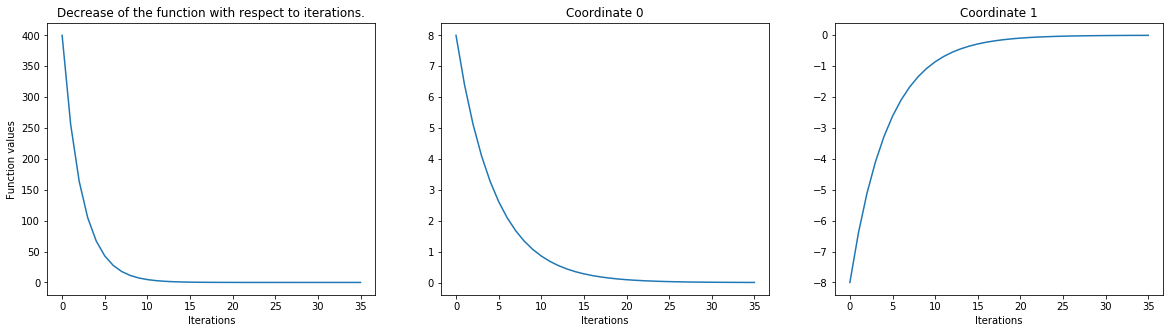

In [14]:
import matplotlib.pyplot as plt
gd.visualize(loss, trajectory)

## How to define your own Optimizer using optim.Optimizer

Minimized the function for 33 steps.


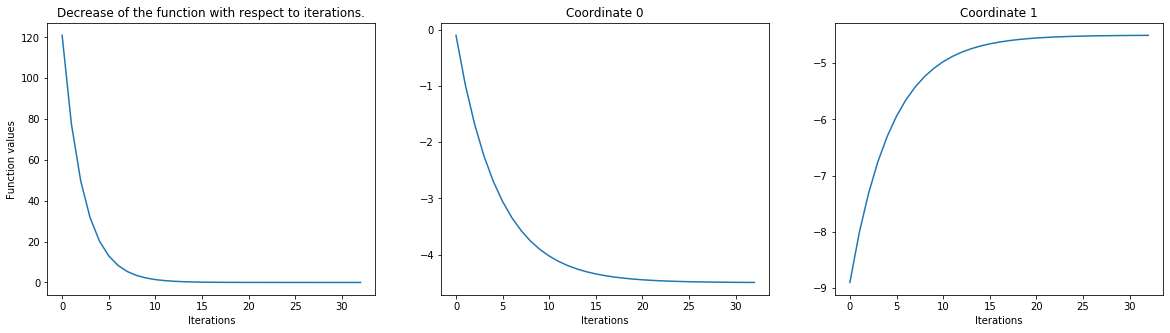

In [17]:
#User-defined gradient descent. 
class MY_OWN_GradientDescent(optim.Optimizer):
    def _step(self, loss):
        self.current_point -= self.lr * loss.grad.T

init_point = Variable([1, -10])
tol = 0.0001
lr = 0.05
my_gd = MY_OWN_GradientDescent(lr, tol, my_loss_fn, init_point)

nb_iterations = 1000
final_point, loss, trajectory = my_gd.minimize(nb_iterations)

gd.visualize(loss, trajectory)

Minimized the function for 143 steps.


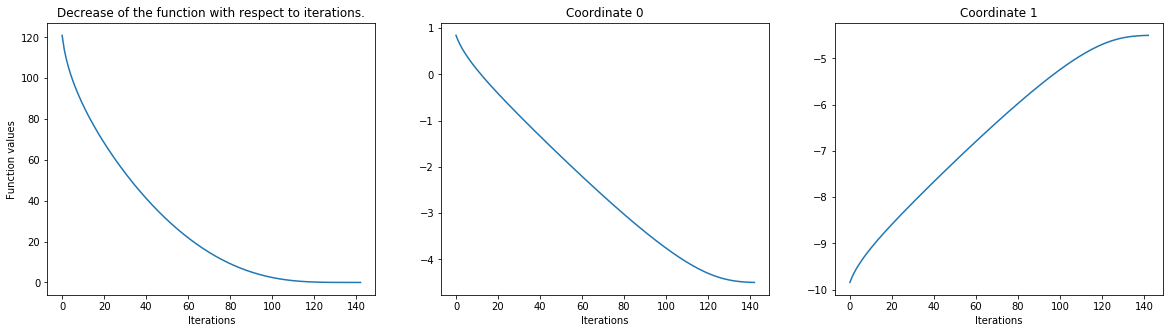

In [18]:
#Runs RMSProp 
init_point = Variable([1, -10])
tol = 0.0001
lr = 0.05
rmsprop = optim.RMSProp(lr, tol, my_loss_fn, init_point)
point, loss, trajectory = rmsprop.minimize(1000)

import matplotlib.pyplot as plt
rmsprop.visualize(loss, trajectory)

# Future Work

## 1-Specific to autodiff.optim
* Use of more general stopping criteria: one may want to optimize a complex function and relax the loss function assumption to obtain reward function for instance. Furthermore, the stopping criterion used so far implicitly assumes the existence and the ability to reach an optimum. Stopping the oterative method whenever the loss is not sufficiently decreasing could be one of the future steps.

* Optimization is an active area of research and any tool that allows to gain insight of the optimization steps is a desiderata for many practicioners.


## 2- Reverse mode 
* One key element that should be included in the future features: making the interface, use and API of Reverse Mode automatic differentation similar to the forward mode API. Consequently, a user could switch from mode to another depending on his needs, and this with minimal impact to his overall codes/files stucture. 


## 3-Others
* Ultimately, many Machine Learning practicioners use torch framework, that allows fast matrix multiplications, parallel computations on GPUs and an extremely efficient reverse mode automatic differentation (based on a C++ data structure). However, no forward mode automatic differentiation is implemented within the framework. Our autodiff package (and the forward mode encapsulated within the Variable) is based on numpy arrays dot products and multiplications. Due to the similarities between Numpy and Torch APIs, our belief is that adapting/extending autodiff to handle tensors should be possible. Without claiming an implementation as efficient as the original torch reverse mode, the autodiff extension could allow the user to easily handle functions in multi-dimensional space for instance. 

**Easy to go from one framework to another.**
```python
import torch 
import numpy as np
x = np.array([1,2])
x_ = torch.from_numpy(x)
print(x_)
>>> tensor([1, 2])
```